# Import packages

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pickle
import math as math
from matplotlib import gridspec
import os
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
#Set figure style

%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

In [3]:
#Load experimental data

# Periodic
filename = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/experimentaldata_scaled.pickled'
data_to_score_against = filename
with open(filename, 'rb') as f:
    syntheticdata = pickle.load(f)
periodic_time, periodic_data = syntheticdata

# Single pulse
filename = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/singlepulse.pickled'
data_to_score_against = filename
with open(filename, 'rb') as f:
    syntheticdata = pickle.load(f)
single_time, single_data = syntheticdata

filename = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Far1Constant.pickled'
with open(filename, 'rb') as f:
    Far1_arr = pickle.load(f)
Far1_time, Far1_data = Far1_arr

filename = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/MAPKdata.pickled'
with open(filename, 'rb') as f:
    MAPK_arr = pickle.load(f)
MAPK_time, MAPK_data = MAPK_arr

# Experimental data only figures
## Constant pheromone

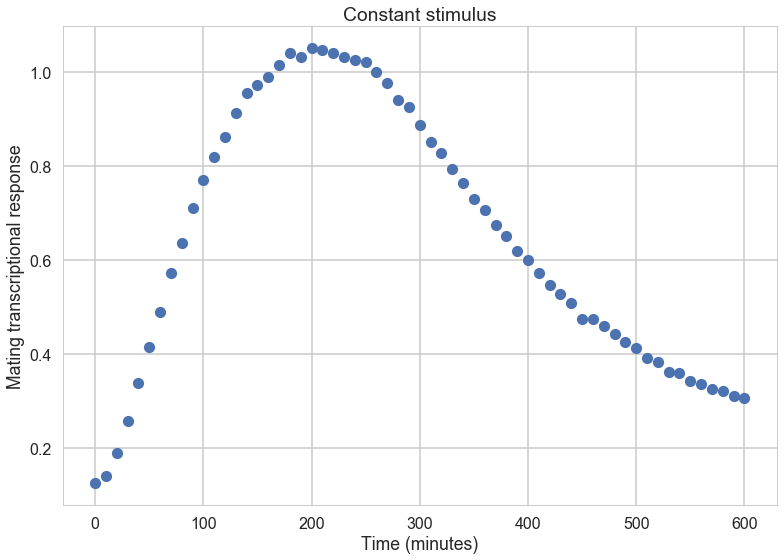

In [4]:
# Plot of constant pheromone
sns.set_context("poster")
plt.plot(single_time[0], single_data[0], 'o')
plt.xlabel("Time (minutes)")
plt.ylabel("Mating transcriptional response")
plt.title("Constant stimulus")
plt.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/ConstantData.jpg')

## Single pulses

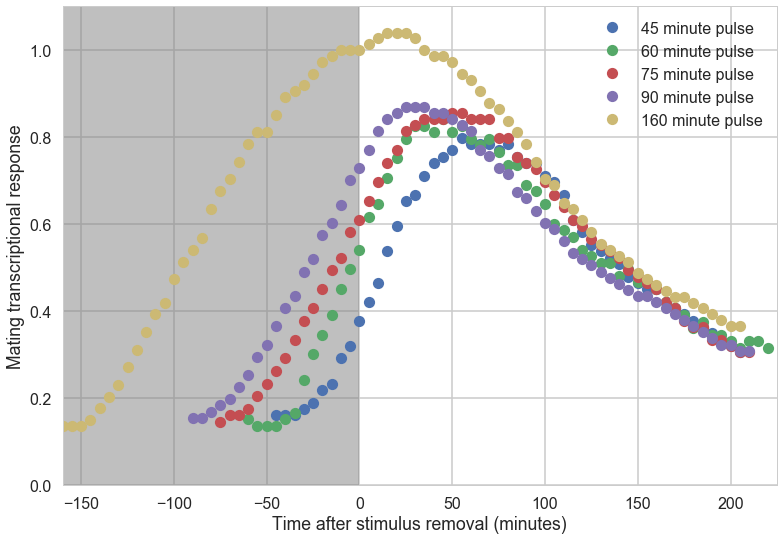

In [5]:
# Generate figure
sns.set_context("poster")
plt.plot(single_time[1]-45,single_data[1],'o')
plt.plot(single_time[2]-60,single_data[2],'o')
plt.plot(single_time[3]-75,single_data[3],'o')
plt.plot(single_time[4]-90,single_data[4],'o')
plt.plot(single_time[5]-160,single_data[5],'o')
plt.legend(["45 minute pulse","60 minute pulse","75 minute pulse","90 minute pulse","160 minute pulse"])
plt.xlabel("Time after stimulus removal (minutes)")
plt.ylabel("Mating transcriptional response")
plt.fill_between([-180,0], 0, 1.2, facecolor='gray', alpha=0.5)
plt.xlim([-160,225])
plt.ylim([0,1.1])
plt.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/SinglePulseData.jpg')

## Periodic stimulation

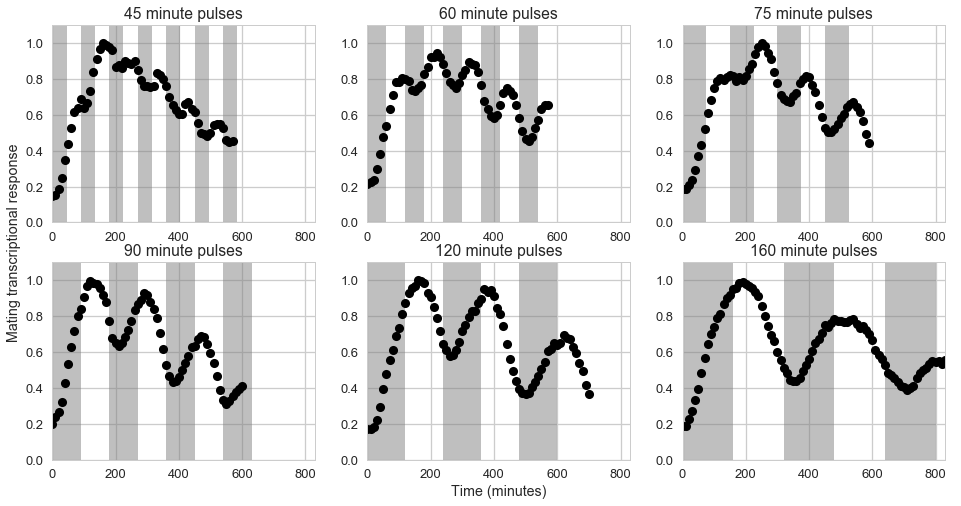

In [6]:
# Generate figure
sns.set_context("talk")
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2,3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])

ax = fig.add_subplot(gs[:,:])
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
ax.set_facecolor('none')
ax.grid('off')

ax1.plot(periodic_time[1],periodic_data[1],'ko')
ax2.plot(periodic_time[2],periodic_data[2],'ko')
ax3.plot(periodic_time[3],periodic_data[3],'ko')
ax4.plot(periodic_time[4],periodic_data[4],'ko')
ax5.plot(periodic_time[5],periodic_data[5],'ko')
ax6.plot(periodic_time[6],periodic_data[6],'ko')
# 45 minute pulses
ax1.fill_between([0,45], 0, 1.2, facecolor='gray', alpha=0.5)
ax1.fill_between([90,135], 0, 1.2, facecolor='gray', alpha=0.5)
ax1.fill_between([180,225], 0, 1.2, facecolor='gray', alpha=0.5)
ax1.fill_between([270,315], 0, 1.2, facecolor='gray', alpha=0.5)
ax1.fill_between([360,405], 0, 1.2, facecolor='gray', alpha=0.5)
ax1.fill_between([450,495], 0, 1.2, facecolor='gray', alpha=0.5)
ax1.fill_between([540,585], 0, 1.2, facecolor='gray', alpha=0.5)
# 60 minute pulses
ax2.fill_between([0,60], 0, 1.2, facecolor='gray', alpha=0.5)
ax2.fill_between([120,180], 0, 1.2, facecolor='gray', alpha=0.5)
ax2.fill_between([240,300], 0, 1.2, facecolor='gray', alpha=0.5)
ax2.fill_between([360,420], 0, 1.2, facecolor='gray', alpha=0.5)
ax2.fill_between([480,540], 0, 1.2, facecolor='gray', alpha=0.5)
# 75 minute pulses
ax3.fill_between([0,75], 0, 1.2, facecolor='gray', alpha=0.5)
ax3.fill_between([150,225], 0, 1.2, facecolor='gray', alpha=0.5)
ax3.fill_between([300,375], 0, 1.2, facecolor='gray', alpha=0.5)
ax3.fill_between([450,525], 0, 1.2, facecolor='gray', alpha=0.5)
# 90 minute pulses
ax4.fill_between([0,90], 0, 1.2, facecolor='gray', alpha=0.5)
ax4.fill_between([180,270], 0, 1.2, facecolor='gray', alpha=0.5)
ax4.fill_between([360,450], 0, 1.2, facecolor='gray', alpha=0.5)
ax4.fill_between([540,630], 0, 1.2, facecolor='gray', alpha=0.5)
# 120 minute pulses
ax5.fill_between([0,120], 0, 1.2, facecolor='gray', alpha=0.5)
ax5.fill_between([240,360], 0, 1.2, facecolor='gray', alpha=0.5)
ax5.fill_between([480,600], 0, 1.2, facecolor='gray', alpha=0.5)
# 160 minute pulses
ax6.fill_between([0,160], 0, 1.2, facecolor='gray', alpha=0.5)
ax6.fill_between([320,480], 0, 1.2, facecolor='gray', alpha=0.5)
ax6.fill_between([640,800], 0, 1.2, facecolor='gray', alpha=0.5)
plt.xlabel("Time (minutes)")
plt.ylabel("Mating transcriptional response")
ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
ax3.set_ylim([0,1.1])
ax4.set_ylim([0,1.1])
ax5.set_ylim([0,1.1])
ax6.set_ylim([0,1.1])
ax1.set_xlim([0,830])
ax2.set_xlim([0,830])
ax3.set_xlim([0,830])
ax4.set_xlim([0,830])
ax5.set_xlim([0,830])
ax6.set_xlim([0,830])
ax1.set_title("45 minute pulses")
ax2.set_title("60 minute pulses")
ax3.set_title("75 minute pulses")
ax4.set_title("90 minute pulses")
ax5.set_title("120 minute pulses")
ax6.set_title("160 minute pulses")
fig.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/PeriodicData.jpg')

## Constant WT and Far1$\Delta$ 

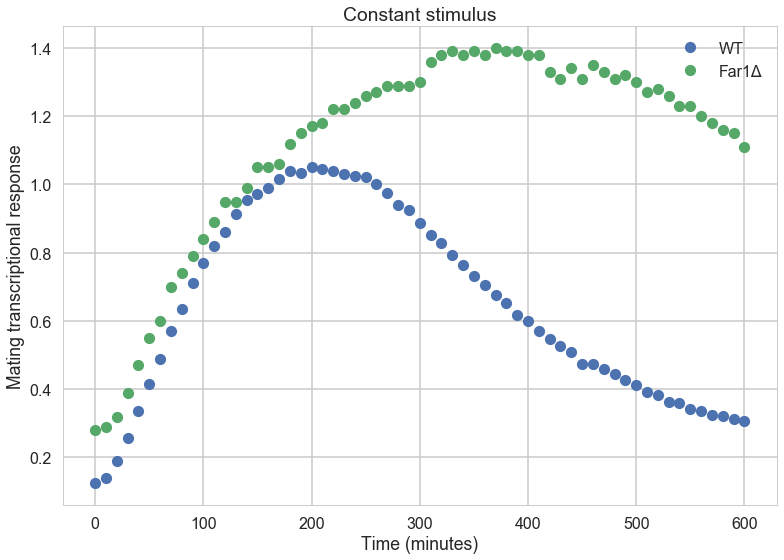

In [7]:
# Plot of constant pheromone
sns.set_context("poster")
plt.plot(single_time[0], single_data[0], 'o')
plt.plot(Far1_time,Far1_data, 'o')
plt.xlabel("Time (minutes)")
plt.ylabel("Mating transcriptional response")
plt.title("Constant stimulus")
plt.legend(['WT','Far1Δ'])
plt.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/ConstantDataMutant.jpg')

## MAPK Data 

NameError: name 'data_norm' is not defined

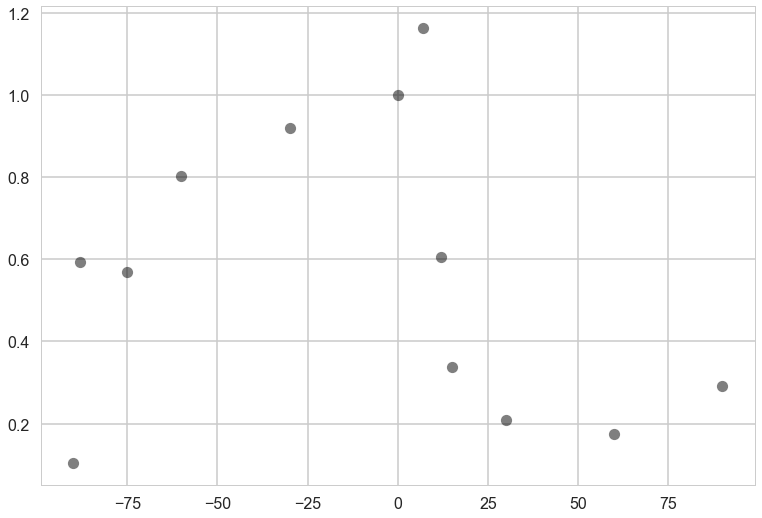

In [8]:
# Generate figure
sns.set_context("poster")
# Data from Nicky 
data_45 = [0.178573428,0.755987678,1.416514368,2.275058421,1.743047812,0.461616261,0.158728478,0.12657877,0.349453669,0.472709938]
data_45_norm= [0.078491799,0.332293743,0.622627689,1,0.766155188,0.202903036,0.069768968,0.055637591,0.153602064,0.207779252]
time_45 = [-45.0,-29.3,-14.7,-0.1,2.0,5.3,7.7,10.7,15.0,20.3]
data_90_norm = []
for i in MAPK_data[1]: data_90_norm.append(i/0.86)
# plot things
plt.plot(np.array(MAPK_time[1])-90,data_90_norm,'ko',alpha=0.5)
plt.plot(time_45,data_norm,'ro',alpha=0.5)
plt.xlabel("Time after stimulus removal (minutes)")
plt.ylabel("Relative ppMAPK")
plt.fill_between([-100,0], 0, 1.2, facecolor='gray', alpha=0.5)
plt.xlim([-100,100])
plt.ylim([0,1.2])
plt.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/SinglePulseMAPKData.jpg')

In [9]:
data_90_norm = []
for i in MAPK_data[1]: data_90_norm.append(i/0.86)
data_90_norm

[0.10465116279069767,
 0.5930232558139535,
 0.5697674418604651,
 0.8023255813953488,
 0.9186046511627908,
 1.0,
 1.1627906976744187,
 0.6046511627906977,
 0.3372093023255814,
 0.20930232558139533,
 0.1744186046511628,
 0.29069767441860467]

# Fit of linear model

In [10]:
# Functions
def load_data(dir_path_data, score_cutoff):
    #MSE threshold score at which to not include 
    val_to_keep_end_score = score_cutoff
    
    #load new data:
    arr_best_scores = []
    arr_best_inds = []
    arr_end_scores = []
    dir_to_check = dir_path_data #'/home/iammoresentient/phd_lab/170307_data_sin_y1'
    files = os.listdir(dir_to_check)
    for i in range(0,len(files)):
        filename = dir_to_check + '/' + files[i]
        if os.path.isfile(filename):
            if os.path.getsize(filename) > 0: 
                if '.pickled' in files[i]:
                    #print(filename)
                    arr_to_unpickle = pickle.load(open(filename,'rb'))
                    arr_best_score, arr_best_ind = arr_to_unpickle
                    temp_end_score = arr_best_score[-1]
                    if temp_end_score < val_to_keep_end_score:
                        arr_end_scores.append(temp_end_score)
                        arr_best_scores.append(arr_best_score)
                        arr_best_inds.append(arr_best_ind)


    print('Loaded ' + str(len(arr_best_scores)) + ' files (out of ' + str(len(files)) + ') with cutoff score of ' + str(score_cutoff))

    #convert to numpy
    arr_best_scores = np.asarray(arr_best_scores)
    arr_best_inds = np.asarray(arr_best_inds)
    arr_end_scores = np.asarray(arr_end_scores)

    return arr_best_scores, arr_end_scores, arr_best_inds
def signal_single(signal_number,t,slope_on,slope_off):
    p = signal_number
    if t < p:
        return 1
    else:
        return 0
        
    return [dX1dt,dX2dt,dX3dt,dX4dt]
def DE_single(y,t,signal_number):
    X1,X2,X3,X4 = y
        
    s=signal_single(signal_number,t,1,1)
        
    # X1
    dX1dt = s-d1*X1
    # X2
    dX2dt = k1*X1-d2*X2
    # X3
    dX3dt = k2*X2-d3*X3
    # X4
    dX4dt = k3*X3-d4*X4
        
    return [dX1dt,dX2dt,dX3dt,dX4dt]

    return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
def simulate_singlepulse_experiment(arr_parameters, time, signal_val,SS):
    # parameters to be learned
    k1, k2, k3, d1, d2, d3, d4 = arr_parameters
    #solve odes:
    odes = odeint(DE_single, SS, time, args=(signal_val,))
    # return array of individual cell counts:
    return odes

In [11]:
# Load data (periodic)
directory = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/180321_LinearPeriodicV2_100g500i10m50c'
arr_best_scores_P, arr_end_scores_P, arr_best_inds_P=load_data(directory,1.052)
arrT_best_inds_P = arr_best_inds_P.transpose()

# for i in range(len(arr_best_scores_P)):
#     plt.plot(np.linspace(0,60,61),arr_best_scores_P[i])
# plt.xlabel('Generation')
# plt.ylabel('Total MSE')

Loaded 11 files (out of 411) with cutoff score of 1.052


/Users/AmyAllen/anaconda/envs/python3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


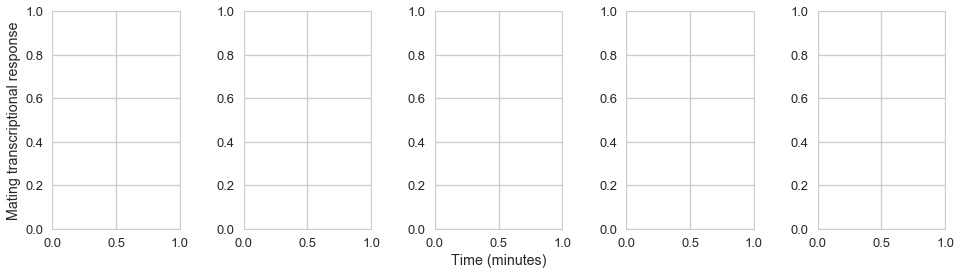

In [13]:
#Generate figure
sns.set_context("talk")
kdegGFP = 10**-1
hc = 2
time = np.linspace(0,830,831)
signal_numbers = [1]
for gen in [100]:

    #7 part plot
    fig = plt.figure(figsize=(16, 4))
    gs = gridspec.GridSpec(1,5)
    ax31 = fig.add_subplot(gs[0,0])
    ax32 = fig.add_subplot(gs[0,1])
    ax33 = fig.add_subplot(gs[0,2])
    ax34 = fig.add_subplot(gs[0,3])
    ax41 = fig.add_subplot(gs[0,4])
    ax = fig.add_subplot(gs[:,:])

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    ax.set_facecolor('none')
    ax.grid('off')
        
    #LOOP THROUGH EA RUNS
    for arr_best_score, arr_best_ind in zip(arr_best_scores_P, arr_best_inds_P):
        for j in range(len(arr_best_inds_P[:,gen])):
            k1, k2, k3, d1, d2, d3, d4 = arr_best_inds_P[j][gen]
            for i in [45,60,75,90,160,250]:
                expX = simulate_singlepulse_experiment(arr_best_inds_P[j][gen], time, i,[0,0,0,0])
                if min(expX[:,3])>0.01:
                    if i == 45:
                        ax31.plot(time, expX[:,3])
                    elif i == 60:
                        ax32.plot(time, expX[:,3])
                    elif i == 75: 
                        ax33.plot(time, expX[:,3])
                    elif i == 90: 
                        ax34.plot(time, expX[:,3])
                    elif i == 160:
                        ax41.plot(time, expX[:,3])
    
    scorefxn_time = single_time
    scorefxn_data = single_data
    ax31.plot(scorefxn_time[1], scorefxn_data[1], 'ko', markersize=5)
    ax31.axis([0, 400, 0, 1.5])
    ax31.set_title("45 minutes")
    ax32.plot(scorefxn_time[2], scorefxn_data[2], 'ko', markersize=5)
    ax32.axis([0, 400, 0, 1.5])
    ax32.set_title("60 minutes")
    ax33.plot(scorefxn_time[3], scorefxn_data[3], 'ko', markersize=5)
    ax33.axis([0, 400, 0, 1.5])
    ax33.set_title("75 minutes")
    ax34.plot(scorefxn_time[4], scorefxn_data[4], 'ko', markersize=5)
    ax34.axis([0, 400, 0, 1.5])
    ax34.set_title("90 minutes")
    ax41.plot(scorefxn_time[5], scorefxn_data[5], 'ko', markersize=5)
    ax41.axis([0, 400, 0, 1.5])
    ax41.set_title("160 minutes")
    
    ax33.set_xlabel('Time (minutes)')
    ax31.set_ylabel('Mating transcriptional response')

    gs.update(wspace=0.5, hspace=0.5)
    #SAVING FIGURES CODE:
    #filename:
    fig.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/LinearFitAll.jpg')

# Fit to single pulses

In [ ]:
# Load data 
directory = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/180126_SinglePulseMutantV1_100g500i10m50c'
arr_best_scores_P, arr_end_scores_P, arr_best_inds_P=load_data(directory,0.479)
arrT_best_inds_P = arr_best_inds_P.transpose()

# for i in range(len(arr_best_scores_P)):
#     plt.plot(np.linspace(0,60,61),arr_best_scores_P[i])
# plt.xlabel('Generation')
# plt.ylabel('Total MSE')

In [ ]:
# Define functions
def signal(signal_number,t,slope_on,slope_off):
    p = signal_number
    if (p)*slope_on < 1:
        maxs = (p)*slope_on
    else:
        maxs = 1
        
    if signal_number == 0:
        return 0
    elif signal_number == 1:
        if t < 1/slope_on:
            return t*slope_on
        else:
            return 1
    else :
        if t < p:
            if t <= p and t < (1/slope_on):
                return ((t)*slope_on)
            else:
                return 1
        else:
            if t >= p and t < maxs/slope_off+(p):
                return -slope_off*(t)+maxs+slope_off*p
            else:
                return 0
def DE(y,t,signal_number,slope_on,slope_off):
    GFP, Fus3, ppFus3, Ste12, Ste12Digs, Far1, pFar1 = y

    s=signal(signal_number,t,slope_on,slope_off)

    # GFP
    dGFPdt = ksynGFP+(ka4*Ste12**hc)/(KGFP+Ste12**hc)-kdegGFP*GFP
    # Fus3
    dFus3dt = ksynF3+(kfb1*Ste12**hc)/(KFus3+Ste12**hc)-kp1*s*Fus3+kp2*ppFus3-kdegF3*Fus3
    # ppFus3
    dppFus3dt = kp1*s*Fus3-kp2*ppFus3
    # Ste12
    dSte12dt = ksynS12+(kfb2*Ste12**hc)/(KSte12+Ste12**hc)-kdegS12*Ste12*(1+(kff*pFar1)/(km1+pFar1))-ka1*Ste12*(DigsT-Ste12Digs)+(ka2*ppFus3+ka3)*Ste12Digs
    # Ste12Digs
    dSte12Digsdt = ka1*Ste12*(DigsT-Ste12Digs)-(ka2*ppFus3+ka3)*Ste12Digs
    # Far1
    dFar1dt = ksynF1+(ka5*Ste12**hc)/(KFar1+Ste12**hc)+kp3*pFar1-kp4*ppFus3*Far1-kdegF1*Far1
    # pFar1
    dpFar1dt = kp4*ppFus3*Far1-kp3*pFar1-kdegPF1*pFar1

    return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
def simulate_single_experiment1(arr_parameters, time, signal_val,SS):
    # parameters to be learned
    kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_parameters
    # parameters to be kept constant
    kdegGFP = 10**-1
    hc = 1
    #solve odes:
    odes = odeint(DE, SS, time, args=(signal_val,slope_on,slope_off,))
    # return array of individual cell counts:
    return odes

In [ ]:
# Generate figure
kdegGFP = 10**-1
hc = 2
time = np.linspace(0,830,831)
signal_numbers = [1]
for gen in [100]:

    #7 part plot
    fig = plt.figure(figsize=(16, 21))
    gs = gridspec.GridSpec(4, 4)
    ax1 = fig.add_subplot(gs[0,:])
    ax21 = fig.add_subplot(gs[1,0])
    ax22 = fig.add_subplot(gs[1,1])
    ax23 = fig.add_subplot(gs[1,2])
    ax24 = fig.add_subplot(gs[1,3])
    ax25 = fig.add_subplot(gs[2,0])
    ax26 = fig.add_subplot(gs[2,1])
    ax27 = fig.add_subplot(gs[2,2])
    ax28 = fig.add_subplot(gs[2,3])
    ax3 = fig.add_subplot(gs[3,:])
    ax = fig.add_subplot(gs[:,:])

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    ax.set_facecolor('none')
    ax.grid('off')


    ax1.set_xlabel('Generation', fontsize=24)
    ax1.set_ylabel('ASE', fontsize=24)
    ax21.set_ylabel('Response', fontsize=24)
    ax25.set_ylabel('Response', fontsize=24)
    
    #PLOT ERROR VS. GENERATION 
    for i in range(len(arr_best_scores_P)):
        ax1.plot(np.linspace(0,100,101),arr_best_scores_P[i])
    
    #DEFINE STEADY STATE - WT
    SS=[]
    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        IC = [0,0,0,0,0,0,0]
        t  = np.linspace(0,40000,100001)
        odes = odeint(DE, IC, t, args=(0,100,100,))
        SS.append(odes[100000,:])
        
    #DEFINE STEADY STATE - MUTANT
    SS_mut=[]
    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        kp4,ksynF1,ka5,kp3 = [0,0,0,0]
        IC = [0,0,0,0,0,0,0]
        t  = np.linspace(0,40000,100001)
        odes = odeint(DE, IC, t, args=(0,100,100,))
        SS_mut.append(odes[100000,:])
        
    #LOOP THROUGH EA RUNS

    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        for i in [1,45,60,75,90,160,250]:
            expX = simulate_single_experiment1(arr_best_inds_P[j][gen], time, i,SS[j])
            if max(expX[:,0])<1.5:
                if i == 1:
                    ax27.plot(time, expX[:,0])
                elif i == 45:
                    ax21.plot(time, expX[:,0])
                elif i == 60: 
                    ax22.plot(time, expX[:,0])
                elif i == 75: 
                    ax23.plot(time, expX[:,0])
                elif i == 90:
                    ax24.plot(time, expX[:,0])
                elif i == 160:
                    ax25.plot(time, expX[:,0])
                elif i == 250: 
                    ax26.plot(time, expX[:,0])
        kp4,ksynF1,ka5,kp3 = [0,0,0,0]
        mut_params = [kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1]
        for i in [1]:
            expX = simulate_single_experiment1(mut_params, time, i,SS[j])
            ax28.plot(time, expX[:,0])
                
                
    #plot synthetic data:
    scorefxn_time = single_time
    scorefxn_data = single_data
    ax21.plot(scorefxn_time[1], scorefxn_data[1], 'ko', markersize=5)
    ax21.axis([0, 570, 0, 1.5])
    ax22.plot(scorefxn_time[2], scorefxn_data[2], 'ko', markersize=5)
    ax22.axis([0, 570, 0, 1.5])
    ax23.plot(scorefxn_time[3], scorefxn_data[3], 'ko', markersize=5)
    ax23.axis([0, 570, 0, 1.5])
    ax24.plot(scorefxn_time[4], scorefxn_data[4], 'ko', markersize=5)
    ax24.axis([0, 570, 0, 1.5])
    ax25.plot(scorefxn_time[5], scorefxn_data[5], 'ko', markersize=5)
    ax25.axis([0, 570, 0, 1.5])
    ax26.plot(scorefxn_time[6], scorefxn_data[6], 'ko', markersize=5)
    ax26.axis([0, 570, 0, 1.5])
    ax27.plot(scorefxn_time[0], scorefxn_data[0], 'ko', markersize=5)
    ax27.axis([0, 570, 0, 1.5])
    ax28.plot(Far1_time, Far1_data, 'ko', markersize=5)
    ax28.axis([0, 570, 0, 1.5])
    
    
    #plot3: violin plots     
    locs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28] #locations to draw a violin plot at 
    labelnames = ['kdegPF1', 'ksynF3', 'kfb1', 'kp1', 'kp2', 'kdegF3', 'ksynS12', 'kfb2', 'kdegS12', 'kff', 'km1', 'ka1', 'DigsT', 'ka2', 'ka3', 'ksynGFP', 'ka4', 'ksynF1', 'ka5', 'kp4', 'kp3', 'kdegF1','slope on','slope off', 'KGFP', 'KFus3', 'KSte12', 'KFar1']
    pts = 100 #how many points on the violinplot curve
    wds = 0.90 #how wide to make a given violinplot 0.9 ~~ 90%

    #violin plots:  
    for i in range(28):
        ax3.violinplot([math.log(y,10) for y in arrT_best_inds_P[i][gen]], [(i+1)], points=pts, widths=wds, showmeans=True)
        #violinplot(data, location, etc)
    
    ax3.set_xticks(locs)
    ax3.set_xticklabels(labelnames, fontsize=18, rotation=90)
    ax3.set_xlabel('Parameters', fontsize=24)
    ax3.set_ylabel('Learned parameter values', fontsize=24)

    gs.update(wspace=0.5, hspace=0.5)
    #SAVING FIGURES CODE:
    fig.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/FullFitSingle.jpg')

In [ ]:
def scorefxn_constants(arr_parameters, time):
    scorefxn_data = single_data
    scorefxn_time = single_time
    mse_total = 0
    arr_params_IP = arr_parameters
    # parameters to be learned
    kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_params_IP
    # parameters to be kept constant
    kdegGFP = 10**-1
    hc = 2
    
    ##### WT #####
    
    #### Single Pulse and Constant ####
    
    def DE(y,t,signal_number,slope_on,slope_off):
        GFP, Fus3, ppFus3, Ste12, Ste12Digs, Far1, pFar1 = y
        
        s=signal(signal_number,t,slope_on,slope_off)
        
        # GFP
        dGFPdt = ksynGFP+(ka4*Ste12**hc)/(KGFP+Ste12**hc)-kdegGFP*GFP
        # Fus3
        dFus3dt = ksynF3+(kfb1*Ste12**hc)/(KFus3+Ste12**hc)-kp1*s*Fus3+kp2*ppFus3-kdegF3*Fus3
        # ppFus3
        dppFus3dt = kp1*s*Fus3-kp2*ppFus3
        # Ste12
        dSte12dt = ksynS12+(kfb2*Ste12**hc)/(KSte12+Ste12**hc)-kdegS12*Ste12*(1+(kff*pFar1)/(km1+pFar1))-ka1*Ste12*(DigsT-Ste12Digs)+(ka2*ppFus3+ka3)*Ste12Digs
        # Ste12Digs
        dSte12Digsdt = ka1*Ste12*(DigsT-Ste12Digs)-(ka2*ppFus3+ka3)*Ste12Digs
        # Far1
        dFar1dt = ksynF1+(ka5*Ste12**hc)/(KFar1+Ste12**hc)+kp3*pFar1-kp4*ppFus3*Far1-kdegF1*Far1
        # pFar1
        dpFar1dt = kp4*ppFus3*Far1-kp3*pFar1-kdegPF1*pFar1
        
        return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
    
    def simulate_single_experiment1(arr_parameters, time, signal_val,SS):
        # parameters to be learned
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_parameters
        # parameters to be kept constant
        kdegGFP = 10**-1
        #solve odes:
        odes = odeint(DE, SS, time, args=(signal_val,slope_on,slope_off,))
        # return array of individual cell counts:
        return odes
    
    # Solve steady state
    IC = [0,0,0,0,0,0,0]
    t  = np.linspace(0,40000,100001)
    odes = odeint(DE, IC, t, args=(0,100,100,))
    TE=0
    for i in range(len(IC)):
        TE+=abs(odes[100000,i]-odes[100000-1,i])
    #print TE
    SS = odes[100000,:]
    # loop through different periods
    signal_numbers = [1]
    for i in range(len(signal_numbers)):
        expX = simulate_single_experiment1(arr_params_IP, time, signal_numbers[i],SS)
        
        if max(expX[:,0])<2:
            # get index of time points closest
            idx_closest_time_points = []
            for each_time in scorefxn_time[i]:
                closest_idx = min(range(len(time)),
                                  key = lambda i: abs(time[i] - each_time))
                idx_closest_time_points.append(closest_idx)

            # use indexes of time points to get data points to score against
            expX_scorefxn_data = expX[[idx_closest_time_points]]

            #SCORE IT! using MSE
            expX_mse = sum(np.abs(scorefxn_data[i] - expX_scorefxn_data[:,0]))
            #print('MSE Exp' + str(idx+1) + ': ', expX_mse)
            mse_total += expX_mse

    ##### FAR1 DELETE #####
    
    kp4,ksynF1,ka5,kp3 = [0,0,0,0]
    mut_params = [kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1]


    def DE(y,t,signal_number,slope_on,slope_off):
        GFP, Fus3, ppFus3, Ste12, Ste12Digs, Far1, pFar1 = y
        
        s=signal(signal_number,t,slope_on,slope_off)
        
        # GFP
        dGFPdt = ksynGFP+(ka4*Ste12**hc)/(KGFP+Ste12**hc)-kdegGFP*GFP
        # Fus3
        dFus3dt = ksynF3+(kfb1*Ste12**hc)/(KFus3+Ste12**hc)-kp1*s*Fus3+kp2*ppFus3-kdegF3*Fus3
        # ppFus3
        dppFus3dt = kp1*s*Fus3-kp2*ppFus3
        # Ste12
        dSte12dt = ksynS12+(kfb2*Ste12**hc)/(KSte12+Ste12**hc)-kdegS12*Ste12*(1+(kff*pFar1)/(km1+pFar1))-ka1*Ste12*(DigsT-Ste12Digs)+(ka2*ppFus3+ka3)*Ste12Digs
        # Ste12Digs
        dSte12Digsdt = ka1*Ste12*(DigsT-Ste12Digs)-(ka2*ppFus3+ka3)*Ste12Digs
        # Far1
        dFar1dt = ksynF1+(ka5*Ste12**hc)/(KFar1+Ste12**hc)+kp3*pFar1-kp4*ppFus3*Far1-kdegF1*Far1
        # pFar1
        dpFar1dt = kp4*ppFus3*Far1-kp3*pFar1-kdegPF1*pFar1
    
        return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
    
    def simulate_single_experiment1(arr_parameters, time, signal_val,SS):
        # parameters to be learned
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_parameters
        # parameters to be kept constant
        kdegGFP = 10**-1
        #solve odes:
        odes = odeint(DE, SS, time, args=(signal_val,slope_on,slope_off,))
        # return array of individual cell counts:
        return odes

    # Solve steady state
    IC = [0,0,0,0,0,0,0]
    t  = np.linspace(0,40000,100001)
    odes = odeint(DE, IC, t, args=(0,100,100,))
    TE=0
    for i in range(len(IC)):
        TE+=abs(odes[100000,i]-odes[100000-1,i])
    #print TE
    SS = odes[100000,:]

    expX = simulate_single_experiment1(mut_params, time, 1,SS)
    # get index of time points closest
    idx_closest_time_points = []
    for each_time in [int(i) for i in Far1_time]:
        closest_idx = min(range(len(time)),
                          key = lambda i: abs(time[i] - each_time))
        idx_closest_time_points.append(closest_idx)

    # use indexes of time points to get data points to score against
    expX_scorefxn_data = expX[[idx_closest_time_points]]
    
    #SCORE IT! using MSE
    expX_mse = sum(np.abs(Far1_data - expX_scorefxn_data[:,0]))
    
    mse_total += expX_mse
    
    return mse_total/(len(Far1_time)+len(scorefxn_time[0]))
def scorefxn_periodic(arr_parameters, time):
    scorefxn_data = periodic_data
    scorefxn_time = periodic_time
    mse_total = 0
    arr_params_IP = arr_parameters
    # parameters to be learned
    kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_params_IP
    # parameters to be kept constant
    kdegGFP = 10**-1
    hc = 2
    
    ##### WT #####
    
    #### Single Pulse and Constant ####
    
    def DE(y,t,signal_number,slope_on,slope_off):
        GFP, Fus3, ppFus3, Ste12, Ste12Digs, Far1, pFar1 = y
        
        s=signal(signal_number,t,slope_on,slope_off)
        
        # GFP
        dGFPdt = ksynGFP+(ka4*Ste12**hc)/(KGFP+Ste12**hc)-kdegGFP*GFP
        # Fus3
        dFus3dt = ksynF3+(kfb1*Ste12**hc)/(KFus3+Ste12**hc)-kp1*s*Fus3+kp2*ppFus3-kdegF3*Fus3
        # ppFus3
        dppFus3dt = kp1*s*Fus3-kp2*ppFus3
        # Ste12
        dSte12dt = ksynS12+(kfb2*Ste12**hc)/(KSte12+Ste12**hc)-kdegS12*Ste12*(1+(kff*pFar1)/(km1+pFar1))-ka1*Ste12*(DigsT-Ste12Digs)+(ka2*ppFus3+ka3)*Ste12Digs
        # Ste12Digs
        dSte12Digsdt = ka1*Ste12*(DigsT-Ste12Digs)-(ka2*ppFus3+ka3)*Ste12Digs
        # Far1
        dFar1dt = ksynF1+(ka5*Ste12**hc)/(KFar1+Ste12**hc)+kp3*pFar1-kp4*ppFus3*Far1-kdegF1*Far1
        # pFar1
        dpFar1dt = kp4*ppFus3*Far1-kp3*pFar1-kdegPF1*pFar1
        
        return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
    
    def simulate_single_experiment1(arr_parameters, time, signal_val,SS):
        # parameters to be learned
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_parameters
        # parameters to be kept constant
        kdegGFP = 10**-1
        #solve odes:
        odes = odeint(DE, SS, time, args=(signal_val,slope_on,slope_off,))
        # return array of individual cell counts:
        return odes
    
    # Solve steady state
    IC = [0,0,0,0,0,0,0]
    t  = np.linspace(0,40000,100001)
    odes = odeint(DE, IC, t, args=(0,100,100,))
    TE=0
    for i in range(len(IC)):
        TE+=abs(odes[100000,i]-odes[100000-1,i])
    #print TE
    SS = odes[100000,:]
    # loop through different periods
    signal_numbers = [1]
    for i in range(len(signal_numbers)):
        expX = simulate_single_experiment1(arr_params_IP, time, signal_numbers[i],SS)
        
        # get index of time points closest
        idx_closest_time_points = []
        for each_time in scorefxn_time[i]:
            closest_idx = min(range(len(time)),
                              key = lambda i: abs(time[i] - each_time))
            idx_closest_time_points.append(closest_idx)
        
        # use indexes of time points to get data points to score against
        expX_scorefxn_data = expX[[idx_closest_time_points]]
        
        #SCORE IT! using MSE
        expX_mse = sum(np.abs(scorefxn_data[i] - expX_scorefxn_data[:,0]))
        #print('MSE Exp' + str(idx+1) + ': ', expX_mse)
        mse_total += expX_mse

    #### Periodic ####

    def DE(y,t,signal_number,slope_on,slope_off):
        GFP, Fus3, ppFus3, Ste12, Ste12Digs, Far1, pFar1 = y
        
        s=periodic_signal(signal_number,t,slope_on,slope_off)
        
        # GFP
        dGFPdt = ksynGFP+(ka4*Ste12**hc)/(KGFP+Ste12**hc)-kdegGFP*GFP
        # Fus3
        dFus3dt = ksynF3+(kfb1*Ste12**hc)/(KFus3+Ste12**hc)-kp1*s*Fus3+kp2*ppFus3-kdegF3*Fus3
        # ppFus3
        dppFus3dt = kp1*s*Fus3-kp2*ppFus3
        # Ste12
        dSte12dt = ksynS12+(kfb2*Ste12**hc)/(KSte12+Ste12**hc)-kdegS12*Ste12*(1+(kff*pFar1)/(km1+pFar1))-ka1*Ste12*(DigsT-Ste12Digs)+(ka2*ppFus3+ka3)*Ste12Digs
        # Ste12Digs
        dSte12Digsdt = ka1*Ste12*(DigsT-Ste12Digs)-(ka2*ppFus3+ka3)*Ste12Digs
        # Far1
        dFar1dt = ksynF1+(ka5*Ste12**hc)/(KFar1+Ste12**hc)+kp3*pFar1-kp4*ppFus3*Far1-kdegF1*Far1
        # pFar1
        dpFar1dt = kp4*ppFus3*Far1-kp3*pFar1-kdegPF1*pFar1
        
        return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
    def periodic_signal(signal_number,t,slope_on,slope_off):
        p = signal_number
        if (p/2)*slope_on < 1:
            maxs = (p/2)*slope_on
        else:
            maxs = 1

        if signal_number == 0:
            return 0
        elif signal_number == 1:
            if t < 1/slope_on:
                return t*slope_on
            else:
                return 1
        else :
            it = math.floor(t/signal_number)
            if t>=it*p and t < it*p+p/2:
                if t >= it*p and t < it*p+(1/slope_on):
                    return ((t-it*p)*slope_on)
                else:
                    return 1
            else:
                if t >= it*p+(p/2) and t < maxs/slope_off+(p)/2+p*it:
                    return -slope_off*(t-it*p)+maxs+slope_off*p/2
                else:
                    return 0

    def simulate_single_experiment1(arr_parameters, time, signal_val,SS):
        # parameters to be learned
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_parameters
        # parameters to be kept constant
        kdegGFP = 10**-1
        #solve odes:
        odes = odeint(DE, SS, time, args=(signal_val,slope_on,slope_off,))
        # return array of individual cell counts:
        return odes

    # loop through different periods
    signal_numbers = [90,120,150,180,240,320]
    for i in range(len(signal_numbers)):
        expX = simulate_single_experiment1(arr_params_IP, time, signal_numbers[i],SS)
        
        if max(expX[:,0])<2:
        
            # get index of time points closest
            idx_closest_time_points = []
            for each_time in periodic_time[i+1]:
                closest_idx = min(range(len(time)),
                                  key = lambda i: abs(time[i] - each_time))
                idx_closest_time_points.append(closest_idx)

            # use indexes of time points to get data points to score against
            expX_scorefxn_data = expX[[idx_closest_time_points]]

            #SCORE IT! using MSE
            expX_mse = sum(np.abs(periodic_data[i+1] - expX_scorefxn_data[:,0]))
            #print('MSE Exp' + str(idx+1) + ': ', expX_mse)
        mse_total += expX_mse
    
    return mse_total/(len(scorefxn_data[0]+periodic_data[1]+periodic_data[2]+periodic_data[3]+periodic_data[4]+periodic_data[5]+periodic_data[6]))
def scorefxn_pulses(arr_parameters, time):
    scorefxn_data = single_data
    scorefxn_time = single_time
    mse_total = 0
    arr_params_IP = arr_parameters
    # parameters to be learned
    kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_params_IP
    # parameters to be kept constant
    kdegGFP = 10**-1
    hc = 2
    
    ##### WT #####
    
    #### Single Pulse and Constant ####
    
    def DE(y,t,signal_number,slope_on,slope_off):
        GFP, Fus3, ppFus3, Ste12, Ste12Digs, Far1, pFar1 = y
        
        s=signal(signal_number,t,slope_on,slope_off)
        
        # GFP
        dGFPdt = ksynGFP+(ka4*Ste12**hc)/(KGFP+Ste12**hc)-kdegGFP*GFP
        # Fus3
        dFus3dt = ksynF3+(kfb1*Ste12**hc)/(KFus3+Ste12**hc)-kp1*s*Fus3+kp2*ppFus3-kdegF3*Fus3
        # ppFus3
        dppFus3dt = kp1*s*Fus3-kp2*ppFus3
        # Ste12
        dSte12dt = ksynS12+(kfb2*Ste12**hc)/(KSte12+Ste12**hc)-kdegS12*Ste12*(1+(kff*pFar1)/(km1+pFar1))-ka1*Ste12*(DigsT-Ste12Digs)+(ka2*ppFus3+ka3)*Ste12Digs
        # Ste12Digs
        dSte12Digsdt = ka1*Ste12*(DigsT-Ste12Digs)-(ka2*ppFus3+ka3)*Ste12Digs
        # Far1
        dFar1dt = ksynF1+(ka5*Ste12**hc)/(KFar1+Ste12**hc)+kp3*pFar1-kp4*ppFus3*Far1-kdegF1*Far1
        # pFar1
        dpFar1dt = kp4*ppFus3*Far1-kp3*pFar1-kdegPF1*pFar1
        
        return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
    
    def simulate_single_experiment1(arr_parameters, time, signal_val,SS):
        # parameters to be learned
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_parameters
        # parameters to be kept constant
        kdegGFP = 10**-1
        #solve odes:
        odes = odeint(DE, SS, time, args=(signal_val,slope_on,slope_off,))
        # return array of individual cell counts:
        return odes
    
    # Solve steady state
    IC = [0,0,0,0,0,0,0]
    t  = np.linspace(0,40000,100001)
    odes = odeint(DE, IC, t, args=(0,100,100,))
    TE=0
    for i in range(len(IC)):
        TE+=abs(odes[100000,i]-odes[100000-1,i])
    #print TE
    SS = odes[100000,:]
    # loop through different periods
    signal_numbers = [1,45,60,75,90,160]
    for i in range(len(signal_numbers)):
        expX = simulate_single_experiment1(arr_params_IP, time, signal_numbers[i],SS)
        
        if max(expX[:,0])<2:
        
            # get index of time points closest
            idx_closest_time_points = []
            for each_time in scorefxn_time[i]:
                closest_idx = min(range(len(time)),
                                  key = lambda i: abs(time[i] - each_time))
                idx_closest_time_points.append(closest_idx)

            # use indexes of time points to get data points to score against
            expX_scorefxn_data = expX[[idx_closest_time_points]]

            #SCORE IT! using MSE
            expX_mse = sum(np.abs(scorefxn_data[i] - expX_scorefxn_data[:,0]))
            #print('MSE Exp' + str(idx+1) + ': ', expX_mse)
            mse_total += expX_mse

    return mse_total/(len(scorefxn_data[0])+len(scorefxn_data[1])+len(scorefxn_data[2])+len(scorefxn_data[3])
                      +len(scorefxn_data[4])+len(scorefxn_data[5])+len(scorefxn_data[6]))

In [ ]:
# Bar Plot
sns.set_context("talk")
gen = 100
constant_err = []
periodic_err = []
pulse_err = []
for j in range(len(arr_best_inds_P[:,gen])):
    constant_err.append(scorefxn_constants(arr_best_inds_P[j][gen],time))
    periodic_err.append(scorefxn_periodic(arr_best_inds_P[j][gen],time))
    pulse_err.append(scorefxn_pulses(arr_best_inds_P[j][gen],time))
sns.barplot(x=["Constant","Single pulse","Periodic"],
            y=[np.mean(constant_err),np.mean(pulse_err),np.mean(periodic_err)],
            ci=[np.std(constant_err),np.std(pulse_err),np.std(periodic_err)],
            capsize=.2)
plt.errorbar([0,1,2], 
             [np.mean(constant_err),np.mean(pulse_err),np.mean(periodic_err)],
             yerr=[np.std(constant_err),np.std(pulse_err),np.std(periodic_err)],
             fmt='k',linestyle='None')
plt.title("Fit to constant and single pulse data")
plt.ylabel("Average absolute error")
plt.ylim([0,0.25])
plt.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/ErrorSingle.jpg')

In [ ]:
[np.std(constant_err),np.std(pulse_err),np.std(periodic_err)]

# Fit to periodic stimulation

In [ ]:
# Load data (periodic)
directory = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/180219_PeriodicData_100g500i10m50c'
arr_best_scores_P, arr_end_scores_P, arr_best_inds_P=load_data(directory,0.659)
arrT_best_inds_P = arr_best_inds_P.transpose()

# for i in range(len(arr_best_scores_P)):
#     plt.plot(np.linspace(0,60,61),arr_best_scores_P[i])
# plt.xlabel('Generation')
# plt.ylabel('Total MSE')

In [ ]:
# Define functions
def signal(signal_number,t,slope_on,slope_off):
    p = signal_number
    if (p/2)*slope_on < 1:
        maxs = (p/2)*slope_on
    else:
        maxs = 1
        
    if signal_number == 0:
        return 0
    elif signal_number == 1:
        if t < 1/slope_on:
            return t*slope_on
        else:
            return 1
    else :
        it = math.floor(t/signal_number)
        if t>=it*p and t < it*p+p/2:
            if t >= it*p and t < it*p+(1/slope_on):
                return ((t-it*p)*slope_on)
            else:
                return 1
        else:
            if t >= it*p+(p/2) and t < maxs/slope_off+(p)/2+p*it:
                return -slope_off*(t-it*p)+maxs+slope_off*p/2
            else:
                return 0
def DE(y,t,signal_number,slope_on,slope_off):
    GFP, Fus3, ppFus3, Ste12, Ste12Digs, Far1, pFar1 = y

    s=signal(signal_number,t,slope_on,slope_off)

    # GFP
    dGFPdt = ksynGFP+(ka4*Ste12**hc)/(KGFP+Ste12**hc)-kdegGFP*GFP
    # Fus3
    dFus3dt = ksynF3+(kfb1*Ste12**hc)/(KFus3+Ste12**hc)-kp1*s*Fus3+kp2*ppFus3-kdegF3*Fus3
    # ppFus3
    dppFus3dt = kp1*s*Fus3-kp2*ppFus3
    # Ste12
    dSte12dt = ksynS12+(kfb2*Ste12**hc)/(KSte12+Ste12**hc)-kdegS12*Ste12*(1+(kff*pFar1)/(km1+pFar1))-ka1*Ste12*(DigsT-Ste12Digs)+(ka2*ppFus3+ka3)*Ste12Digs
    # Ste12Digs
    dSte12Digsdt = ka1*Ste12*(DigsT-Ste12Digs)-(ka2*ppFus3+ka3)*Ste12Digs
    # Far1
    dFar1dt = ksynF1+(ka5*Ste12**hc)/(KFar1+Ste12**hc)+kp3*pFar1-kp4*ppFus3*Far1-kdegF1*Far1
    # pFar1
    dpFar1dt = kp4*ppFus3*Far1-kp3*pFar1-kdegPF1*pFar1

    return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
def simulate_single_experiment1(arr_parameters, time, signal_val,SS):
    # parameters to be learned
    kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_parameters
    # parameters to be kept constant
    kdegGFP = 10**-1
    hc = 1
    #solve odes:
    odes = odeint(DE, SS, time, args=(signal_val,slope_on,slope_off,))
    # return array of individual cell counts:
    return odes

In [ ]:
# Generate figure
kdegGFP = 10**-1
hc = 2
time = np.linspace(0,830,831)
signal_numbers = [1]
for gen in [100]:

    #7 part plot
    fig = plt.figure(figsize=(16, 21))
    gs = gridspec.GridSpec(4, 4)
    ax1 = fig.add_subplot(gs[0,:])
    ax21 = fig.add_subplot(gs[1,0])
    ax22 = fig.add_subplot(gs[1,1])
    ax23 = fig.add_subplot(gs[1,2])
    ax24 = fig.add_subplot(gs[1,3])
    ax25 = fig.add_subplot(gs[2,0])
    ax26 = fig.add_subplot(gs[2,1])
    ax27 = fig.add_subplot(gs[2,2])
    ax28 = fig.add_subplot(gs[2,3])
    ax3 = fig.add_subplot(gs[3,:])
    ax = fig.add_subplot(gs[:,:])

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    ax.set_facecolor('none')
    ax.grid('off')

    ax1.set_xlabel('Generation', fontsize=24)
    ax1.set_ylabel('ASE', fontsize=24)
    ax21.set_ylabel('Response', fontsize=24)
    ax25.set_ylabel('Response', fontsize=24)
    
    #PLOT ERROR VS. GENERATION 
    for i in range(len(arr_best_scores_P)):
        ax1.plot(np.linspace(0,100,101),arr_best_scores_P[i])
    
    #DEFINE STEADY STATE - WT
    SS=[]
    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        IC = [0,0,0,0,0,0,0]
        t  = np.linspace(0,40000,100001)
        odes = odeint(DE, IC, t, args=(0,100,100,))
        SS.append(odes[100000,:])
        
    #DEFINE STEADY STATE - MUTANT
    SS_mut=[]
    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        kp4,ksynF1,ka5,kp3 = [0,0,0,0]
        IC = [0,0,0,0,0,0,0]
        t  = np.linspace(0,40000,100001)
        odes = odeint(DE, IC, t, args=(0,100,100,))
        SS_mut.append(odes[100000,:])
        
    #LOOP THROUGH EA RUNS
    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        for i in [1,90,120,150,180,240,320]:
            expX = simulate_single_experiment1(arr_best_inds_P[j][gen], time, i,SS[j])
            if max(expX[:,0])<1.5:
                if i == 1:
                    ax27.plot(time, expX[:,0])
                elif i == 90:
                    ax21.plot(time, expX[:,0])
                elif i == 120: 
                    ax22.plot(time, expX[:,0])
                elif i == 150: 
                    ax23.plot(time, expX[:,0])
                elif i == 180:
                    ax24.plot(time, expX[:,0])
                elif i == 240:
                    ax25.plot(time, expX[:,0])
                elif i == 320: 
                    ax26.plot(time, expX[:,0])
        kp4,ksynF1,ka5,kp3 = [0,0,0,0]
        mut_params = [kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1]
        for i in [1]:
            expX = simulate_single_experiment1(mut_params, time, i,SS[j])
            ax28.plot(time, expX[:,0])
                
                
    #plot synthetic data:
    scorefxn_time = periodic_time
    scorefxn_data = periodic_data
    ax21.plot(scorefxn_time[1], scorefxn_data[1], 'ko', markersize=5)
    ax21.axis([0, 570, 0, 1.5])
    ax22.plot(scorefxn_time[2], scorefxn_data[2], 'ko', markersize=5)
    ax22.axis([0, 570, 0, 1.5])
    ax23.plot(scorefxn_time[3], scorefxn_data[3], 'ko', markersize=5)
    ax23.axis([0, 570, 0, 1.5])
    ax24.plot(scorefxn_time[4], scorefxn_data[4], 'ko', markersize=5)
    ax24.axis([0, 570, 0, 1.5])
    ax25.plot(scorefxn_time[5], scorefxn_data[5], 'ko', markersize=5)
    ax25.axis([0, 570, 0, 1.5])
    ax26.plot(scorefxn_time[6], scorefxn_data[6], 'ko', markersize=5)
    ax26.axis([0, 570, 0, 1.5])
    ax27.plot(scorefxn_time[0], scorefxn_data[0], 'ko', markersize=5)
    ax27.axis([0, 570, 0, 1.5])
    ax28.plot(Far1_time, Far1_data, 'ko', markersize=5)
    ax28.axis([0, 570, 0, 1.5])
    
    
    #plot3: violin plots     
    locs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28] #locations to draw a violin plot at 
    labelnames = ['kdegPF1', 'ksynF3', 'kfb1', 'kp1', 'kp2', 'kdegF3', 'ksynS12', 'kfb2', 'kdegS12', 'kff', 'km1', 'ka1', 'DigsT', 'ka2', 'ka3', 'ksynGFP', 'ka4', 'ksynF1', 'ka5', 'kp4', 'kp3', 'kdegF1','slope on','slope off', 'KGFP', 'KFus3', 'KSte12', 'KFar1']
    pts = 100 #how many points on the violinplot curve
    wds = 0.90 #how wide to make a given violinplot 0.9 ~~ 90%

    #violin plots:  
    for i in range(28):
        ax3.violinplot([math.log(y,10) for y in arrT_best_inds_P[i][gen]], [(i+1)], points=pts, widths=wds, showmeans=True)
        #violinplot(data, location, etc)
    
    ax3.set_xticks(locs)
    ax3.set_xticklabels(labelnames, fontsize=18, rotation=90)
    ax3.set_xlabel('Parameters', fontsize=24)
    ax3.set_ylabel('Learned parameter values', fontsize=24)


    gs.update(wspace=0.5, hspace=0.5)
    #SAVING FIGURES CODE:
    fig.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/FullFitPeriodic.jpg')

In [ ]:
sns.set_context("talk")
gen = 100
constant_err = []
periodic_err = []
pulse_err = []
for j in range(len(arr_best_inds_P[:,gen])):
    constant_err.append(scorefxn_constants(arr_best_inds_P[j][gen],time))
    periodic_err.append(scorefxn_periodic(arr_best_inds_P[j][gen],time))
    pulse_err.append(scorefxn_pulses(arr_best_inds_P[j][gen],time))
sns.barplot(x=["Constant","Single pulse","Periodic"],y=[np.mean(constant_err),np.mean(pulse_err),np.mean(periodic_err)])
plt.errorbar([0,1,2], 
             [np.mean(constant_err),np.mean(pulse_err),np.mean(periodic_err)],
             yerr=[np.std(constant_err),np.std(pulse_err),np.std(periodic_err)],
             fmt='k',linestyle='None')
plt.title("Fit to constant and periodic pulse data")
plt.ylabel("Average absolute error")
plt.ylim([0,0.25])
plt.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/ErrorPeriodic.jpg')

# Fit to all data

In [67]:
# Load data (periodic)
directory = '/Users/AmyAllen/Documents/ThesisWork/ModelSelection/Mating-Model/Data/Full Model/180221_AllData_100g500i10m50c'
arr_best_scores_P, arr_end_scores_P, arr_best_inds_P=load_data(directory,0.98)
arrT_best_inds_P = arr_best_inds_P.transpose()

# for i in range(len(arr_best_scores_P)):
#     plt.plot(np.linspace(0,60,61),arr_best_scores_P[i])
# plt.xlabel('Generation')
# plt.ylabel('Total MSE')

Loaded 20 files (out of 1969) with cutoff score of 0.98


In [9]:
# Define functions
def signal_periodic(signal_number,t,slope_on,slope_off):
    p = signal_number
    if (p/2)*slope_on < 1:
        maxs = (p/2)*slope_on
    else:
        maxs = 1
        
    if signal_number == 0:
        return 0
    elif signal_number == 1:
        if t < 1/slope_on:
            return t*slope_on
        else:
            return 1
    else :
        it = math.floor(t/signal_number)
        if t>=it*p and t < it*p+p/2:
            if t >= it*p and t < it*p+(1/slope_on):
                return ((t-it*p)*slope_on)
            else:
                return 1
        else:
            if t >= it*p+(p/2) and t < maxs/slope_off+(p)/2+p*it:
                return -slope_off*(t-it*p)+maxs+slope_off*p/2
            else:
                return 0
def signal_single(signal_number,t,slope_on,slope_off):
    p = signal_number
    if (p)*slope_on < 1:
        maxs = (p)*slope_on
    else:
        maxs = 1
        
    if signal_number == 0:
        return 0
    elif signal_number == 1:
        if t < 1/slope_on:
            return t*slope_on
        else:
            return 1
    else :
        if t < p:
            if t <= p and t < (1/slope_on):
                return ((t)*slope_on)
            else:
                return 1
        else:
            if t >= p and t < maxs/slope_off+(p):
                return -slope_off*(t)+maxs+slope_off*p
            else:
                return 0
            
def DE_periodic(y,t,signal_number,slope_on,slope_off):
    GFP, Fus3, ppFus3, Ste12, Ste12Digs, Far1, pFar1 = y

    s=signal_periodic(signal_number,t,slope_on,slope_off)

    # GFP
    dGFPdt = ksynGFP+(ka4*Ste12**hc)/(KGFP+Ste12**hc)-kdegGFP*GFP
    # Fus3
    dFus3dt = ksynF3+(kfb1*Ste12**hc)/(KFus3+Ste12**hc)-kp1*s*Fus3+kp2*ppFus3-kdegF3*Fus3
    # ppFus3
    dppFus3dt = kp1*s*Fus3-kp2*ppFus3
    # Ste12
    dSte12dt = ksynS12+(kfb2*Ste12**hc)/(KSte12+Ste12**hc)-kdegS12*Ste12*(1+(kff*pFar1)/(km1+pFar1))-ka1*Ste12*(DigsT-Ste12Digs)+(ka2*ppFus3+ka3)*Ste12Digs
    # Ste12Digs
    dSte12Digsdt = ka1*Ste12*(DigsT-Ste12Digs)-(ka2*ppFus3+ka3)*Ste12Digs
    # Far1
    dFar1dt = ksynF1+(ka5*Ste12**hc)/(KFar1+Ste12**hc)+kp3*pFar1-kp4*ppFus3*Far1-kdegF1*Far1
    # pFar1
    dpFar1dt = kp4*ppFus3*Far1-kp3*pFar1-kdegPF1*pFar1

    return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
def DE_single(y,t,signal_number,slope_on,slope_off):
    GFP, Fus3, ppFus3, Ste12, Ste12Digs, Far1, pFar1 = y

    s=signal_single(signal_number,t,slope_on,slope_off)

    # GFP
    dGFPdt = ksynGFP+(ka4*Ste12**hc)/(KGFP+Ste12**hc)-kdegGFP*GFP
    # Fus3
    dFus3dt = ksynF3+(kfb1*Ste12**hc)/(KFus3+Ste12**hc)-kp1*s*Fus3+kp2*ppFus3-kdegF3*Fus3
    # ppFus3
    dppFus3dt = kp1*s*Fus3-kp2*ppFus3
    # Ste12
    dSte12dt = ksynS12+(kfb2*Ste12**hc)/(KSte12+Ste12**hc)-kdegS12*Ste12*(1+(kff*pFar1)/(km1+pFar1))-ka1*Ste12*(DigsT-Ste12Digs)+(ka2*ppFus3+ka3)*Ste12Digs
    # Ste12Digs
    dSte12Digsdt = ka1*Ste12*(DigsT-Ste12Digs)-(ka2*ppFus3+ka3)*Ste12Digs
    # Far1
    dFar1dt = ksynF1+(ka5*Ste12**hc)/(KFar1+Ste12**hc)+kp3*pFar1-kp4*ppFus3*Far1-kdegF1*Far1
    # pFar1
    dpFar1dt = kp4*ppFus3*Far1-kp3*pFar1-kdegPF1*pFar1

    return [dGFPdt, dFus3dt, dppFus3dt, dSte12dt, dSte12Digsdt, dFar1dt, dpFar1dt]
def simulate_periodic_experiment(arr_parameters, time, signal_val,SS):
    # parameters to be learned
    kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_parameters
    # parameters to be kept constant
    kdegGFP = 10**-1
    hc = 1
    #solve odes:
    odes = odeint(DE_periodic, SS, time, args=(signal_val,slope_on,slope_off,))
    # return array of individual cell counts:
    return odes
def simulate_singlepulse_experiment(arr_parameters, time, signal_val,SS):
    # parameters to be learned
    kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_parameters
    # parameters to be kept constant
    kdegGFP = 10**-1
    hc = 1
    #solve odes:
    odes = odeint(DE_single, SS, time, args=(signal_val,slope_on,slope_off,))
    # return array of individual cell counts:
    return odes

/Users/AmyAllen/anaconda/envs/python3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


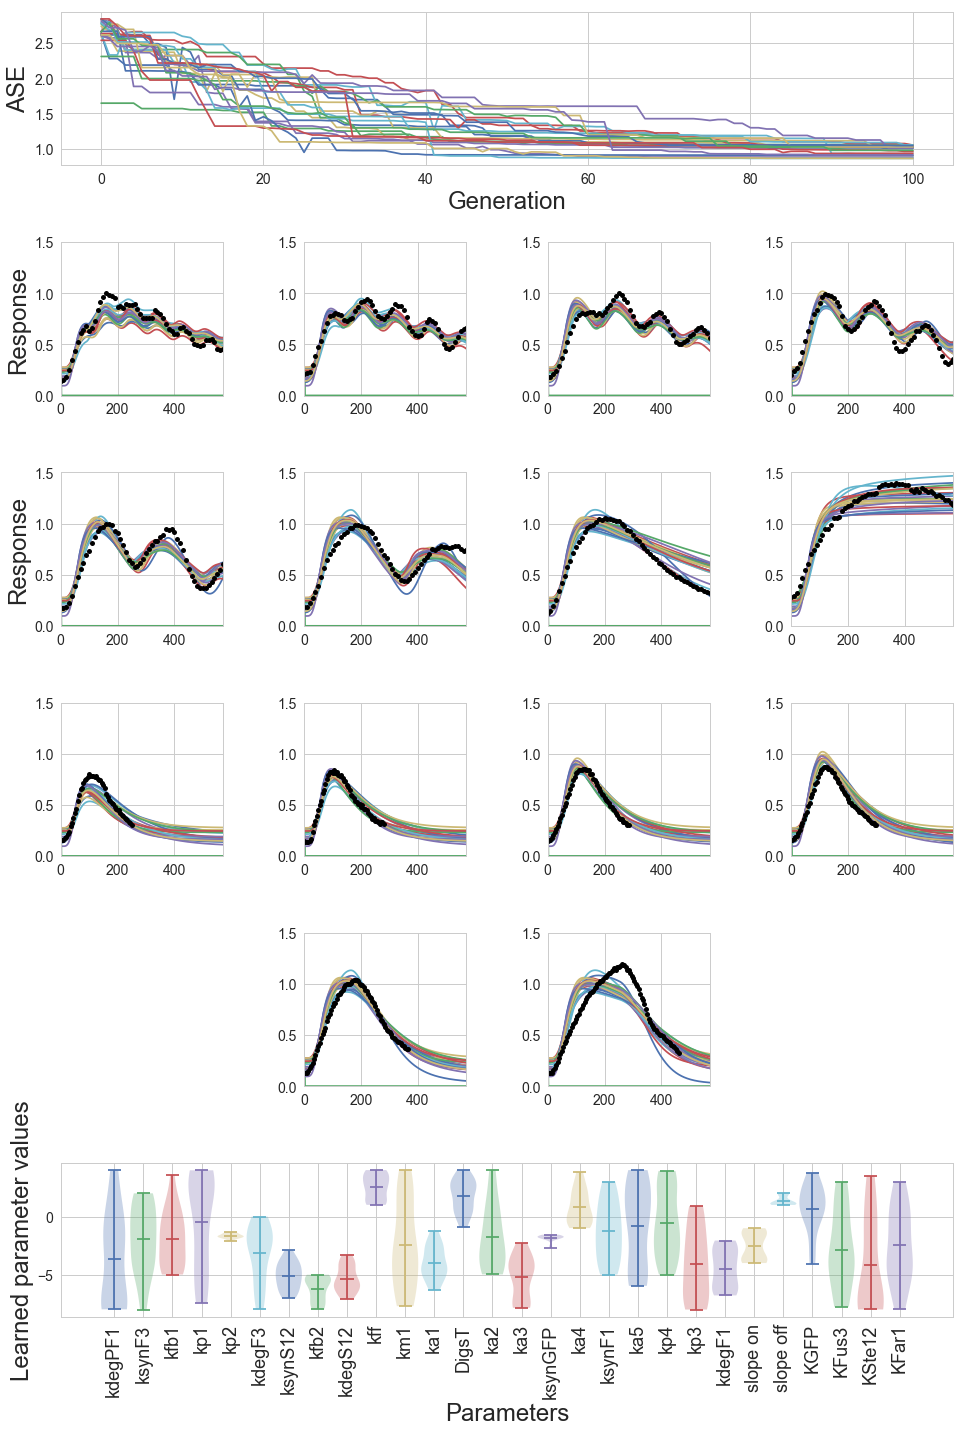

In [10]:
# Generate figure 
kdegGFP = 10**-1
hc = 2
time = np.linspace(0,830,831)
signal_numbers = [1]
for gen in [100]:

    #7 part plot
    fig = plt.figure(figsize=(16, 24))
    gs = gridspec.GridSpec(6,4)
    ax1 = fig.add_subplot(gs[0,:])
    ax21 = fig.add_subplot(gs[1,0])
    ax22 = fig.add_subplot(gs[1,1])
    ax23 = fig.add_subplot(gs[1,2])
    ax24 = fig.add_subplot(gs[1,3])
    ax25 = fig.add_subplot(gs[2,0])
    ax26 = fig.add_subplot(gs[2,1])
    ax27 = fig.add_subplot(gs[2,2])
    ax28 = fig.add_subplot(gs[2,3])
    ax31 = fig.add_subplot(gs[3,0])
    ax32 = fig.add_subplot(gs[3,1])
    ax33 = fig.add_subplot(gs[3,2])
    ax34 = fig.add_subplot(gs[3,3])
    ax41 = fig.add_subplot(gs[4,1])
    ax42 = fig.add_subplot(gs[4,2])
    ax3 = fig.add_subplot(gs[5,:])
    ax = fig.add_subplot(gs[:,:])

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    ax.set_facecolor('none')
    ax.grid('off')

    ax1.set_xlabel('Generation', fontsize=24)
    ax1.set_ylabel('ASE', fontsize=24)
    ax21.set_ylabel('Response', fontsize=24)
    ax25.set_ylabel('Response', fontsize=24)
    
    #PLOT ERROR VS. GENERATION 
    for i in range(len(arr_best_scores_P)):
        ax1.plot(np.linspace(0,100,101),arr_best_scores_P[i])
    
    #DEFINE STEADY STATE - WT
    SS=[]
    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        IC = [0,0,0,0,0,0,0]
        t  = np.linspace(0,40000,100001)
        odes = odeint(DE_periodic, IC, t, args=(0,100,100,))
        SS.append(odes[100000,:])
        
    #DEFINE STEADY STATE - MUTANT
    SS_mut=[]
    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        kp4,ksynF1,ka5,kp3 = [0,0,0,0]
        IC = [0,0,0,0,0,0,0]
        t  = np.linspace(0,40000,100001)
        odes = odeint(DE_periodic, IC, t, args=(0,100,100,))
        SS_mut.append(odes[100000,:])
        
    #LOOP THROUGH EA RUNS
    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        for i in [1,90,120,150,180,240,320]:
            expX = simulate_periodic_experiment(arr_best_inds_P[j][gen], time, i,SS[j])
            if max(expX[:,0])<1.5:
                if i == 1:
                    ax27.plot(time, expX[:,0])
                elif i == 90:
                    ax21.plot(time, expX[:,0])
                elif i == 120: 
                    ax22.plot(time, expX[:,0])
                elif i == 150: 
                    ax23.plot(time, expX[:,0])
                elif i == 180:
                    ax24.plot(time, expX[:,0])
                elif i == 240:
                    ax25.plot(time, expX[:,0])
                elif i == 320: 
                    ax26.plot(time, expX[:,0])
        for i in [45,60,75,90,160,250]:
            expX = simulate_singlepulse_experiment(arr_best_inds_P[j][gen], time, i,SS[j])
            if i == 45:
                ax31.plot(time, expX[:,0])
            elif i == 60:
                ax32.plot(time, expX[:,0])
            elif i == 75: 
                ax33.plot(time, expX[:,0])
            elif i == 90: 
                ax34.plot(time, expX[:,0])
            elif i == 160:
                ax41.plot(time, expX[:,0])
            elif i == 250:
                ax42.plot(time, expX[:,0])
        kp4,ksynF1,ka5,kp3 = [0,0,0,0]
        mut_params = [kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1]
        for i in [1]:
            expX = simulate_periodic_experiment(mut_params, time, i,SS[j])
            ax28.plot(time, expX[:,0])
                
                
    #plot experimental data:
    scorefxn_time = periodic_time
    scorefxn_data = periodic_data
    ax21.plot(scorefxn_time[1], scorefxn_data[1], 'ko', markersize=5)
    ax21.axis([0, 570, 0, 1.5])
    ax22.plot(scorefxn_time[2], scorefxn_data[2], 'ko', markersize=5)
    ax22.axis([0, 570, 0, 1.5])
    ax23.plot(scorefxn_time[3], scorefxn_data[3], 'ko', markersize=5)
    ax23.axis([0, 570, 0, 1.5])
    ax24.plot(scorefxn_time[4], scorefxn_data[4], 'ko', markersize=5)
    ax24.axis([0, 570, 0, 1.5])
    ax25.plot(scorefxn_time[5], scorefxn_data[5], 'ko', markersize=5)
    ax25.axis([0, 570, 0, 1.5])
    ax26.plot(scorefxn_time[6], scorefxn_data[6], 'ko', markersize=5)
    ax26.axis([0, 570, 0, 1.5])
    ax27.plot(scorefxn_time[0], scorefxn_data[0], 'ko', markersize=5)
    ax27.axis([0, 570, 0, 1.5])
    ax28.plot(Far1_time, Far1_data, 'ko', markersize=5)
    ax28.axis([0, 570, 0, 1.5])
    
    scorefxn_time = single_time
    scorefxn_data = single_data
    ax31.plot(scorefxn_time[1], scorefxn_data[1], 'ko', markersize=5)
    ax31.axis([0, 570, 0, 1.5])
    ax32.plot(scorefxn_time[2], scorefxn_data[2], 'ko', markersize=5)
    ax32.axis([0, 570, 0, 1.5])
    ax33.plot(scorefxn_time[3], scorefxn_data[3], 'ko', markersize=5)
    ax33.axis([0, 570, 0, 1.5])
    ax34.plot(scorefxn_time[4], scorefxn_data[4], 'ko', markersize=5)
    ax34.axis([0, 570, 0, 1.5])
    ax41.plot(scorefxn_time[5], scorefxn_data[5], 'ko', markersize=5)
    ax41.axis([0, 570, 0, 1.5])
    ax42.plot(scorefxn_time[6], scorefxn_data[6], 'ko', markersize=5)
    ax42.axis([0, 570, 0, 1.5])

    
    #plot3: violin plots     
    locs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28] #locations to draw a violin plot at 
    labelnames = ['kdegPF1', 'ksynF3', 'kfb1', 'kp1', 'kp2', 'kdegF3', 'ksynS12', 'kfb2', 'kdegS12', 'kff', 'km1', 'ka1', 'DigsT', 'ka2', 'ka3', 'ksynGFP', 'ka4', 'ksynF1', 'ka5', 'kp4', 'kp3', 'kdegF1','slope on','slope off', 'KGFP', 'KFus3', 'KSte12', 'KFar1']
    pts = 100 #how many points on the violinplot curve
    wds = 0.90 #how wide to make a given violinplot 0.9 ~~ 90%

    #violin plots:  
    for i in range(28):
        ax3.violinplot([math.log(y,10) for y in arrT_best_inds_P[i][gen]], [(i+1)], points=pts, widths=wds, showmeans=True)
        #violinplot(data, location, etc)
    
    ax3.set_xticks(locs)
    ax3.set_xticklabels(labelnames, fontsize=18, rotation=90)
    ax3.set_xlabel('Parameters', fontsize=24)
    ax3.set_ylabel('Learned parameter values', fontsize=24)


    gs.update(wspace=0.5, hspace=0.5)
    #SAVING FIGURES CODE:
    fig.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/FullFitAll.jpg')

In [ ]:
sns.set_context("talk")
gen = 100
constant_err = []
periodic_err = []
pulse_err = []
for j in range(len(arr_best_inds_P[:,gen])):
    constant_err.append(scorefxn_constants(arr_best_inds_P[j][gen],time))
    periodic_err.append(scorefxn_periodic(arr_best_inds_P[j][gen],time))
    pulse_err.append(scorefxn_pulses(arr_best_inds_P[j][gen],time))
sns.barplot(x=["Constant","Single pulse","Periodic"],y=[np.mean(constant_err),np.mean(pulse_err),np.mean(periodic_err)])
plt.errorbar([0,1,2], 
             [np.mean(constant_err),np.mean(pulse_err),np.mean(periodic_err)],
             yerr=[np.std(constant_err),np.std(pulse_err),np.std(periodic_err)],
             fmt='k',linestyle='None')
plt.title("Fit to all data")
plt.ylabel("Average absolute error")
plt.ylim([0,0.25])
plt.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/ErrorAll.jpg')

## MAPK profile

/Users/AmyAllen/anaconda/envs/python3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


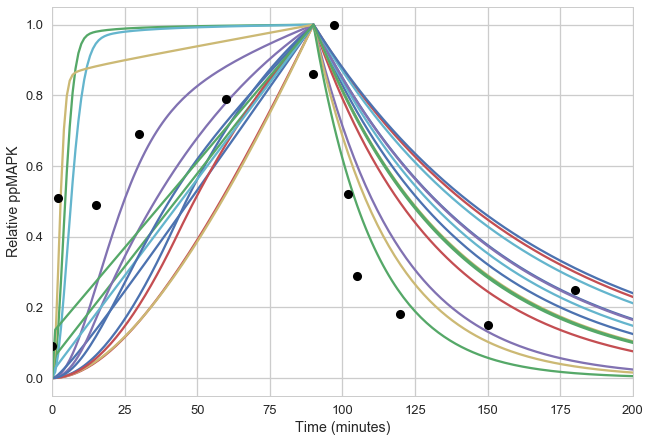

In [27]:
sns.set_context("talk")
gen = 100
SS=[]
for j in range(len(arr_best_inds_P[:,gen])):
    kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
    IC = [0,0,0,0,0,0,0]
    t  = np.linspace(0,40000,100001)
    odes = odeint(DE_periodic, IC, t, args=(0,100,100,))
    SS.append(odes[100000,:])

for j in range(len(arr_best_inds_P[:,gen])):
    kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
    for i in [90]:
        expX = simulate_singlepulse_experiment(arr_best_inds_P[j][gen], time, i,SS[j])
        if max(expX[:,2]<100) and min(expX[:,2]>=0):
            plt.plot(time, expX[:,2]/max(expX[:,2]))
plt.xlim([0,200])
plt.plot(MAPK_time[1],MAPK_data[1],'ko')
plt.ylabel("Relative ppMAPK")
plt.xlabel("Time (minutes)")
plt.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/MAPKfits.jpg')

In [21]:
MAPK_data

[[0.0, 0.46, 0.6, 0.63, 0.69, 0.8, 0.84, 0.86, 0.94, 1.0, 0.79],
 [0.09, 0.51, 0.49, 0.69, 0.79, 0.86, 1.0, 0.52, 0.29, 0.18, 0.15, 0.25]]

# Effect of changing individual parameters
## Transcriptional repressors

In [ ]:
gs = gridspec.GridSpec(2,4)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax1m = fig.add_subplot(gs[1,0])
ax2m = fig.add_subplot(gs[1,1])
ax3m = fig.add_subplot(gs[1,2])
ax4m = fig.add_subplot(gs[1,3])

# PERIODIC
for arr_best_score, arr_best_ind in zip(arr_best_scores_P, arr_best_inds_P):
    for j in range(len(arr_best_inds_P[:,gen])):
        kdegPF1, ksynF3, kfb1, kp1, kp2, kdegF3, ksynS12, kfb2, kdegS12, kff, km1, ka1, DigsT, ka2, ka3, ksynGFP,ka4, ksynF1, ka5, kp4, kp3, kdegF1, slope_on, slope_off, KGFP, KFus3, KSte12, KFar1 = arr_best_inds_P[j][gen]
        for i in [1,90,120,150,180,240,320]:
            expX = simulate_periodic_experiment(arr_best_inds_P[j][gen], time, i,SS[j])
            if max(expX[:,0])<1.5:
                if i == 90:
                    ax1.plot(time, expX[:,0])
                elif i == 320:
                    ax2.plot(time, expX[:,0])

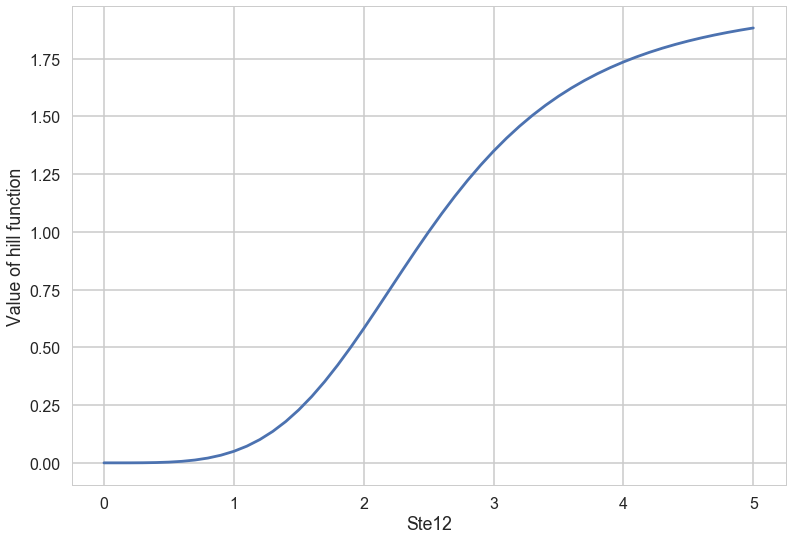

In [51]:
x = np.linspace(0,5,51)
K = 2.5
hc = 4
k = 2
y = []
for i in range(len(x)):
    y.append((k*x[i]**hc)/(K**hc+x[i]**hc))
plt.plot(x,y)
plt.xlabel("Ste12")
plt.ylabel("Value of hill function")
plt.savefig('/Users/AmyAllen/Documents/ThesisWork/ModelSelection/modelingEA/Figures/HillFunction.jpg')

In [74]:
params = ['kdegPF1', 'ksynF3', 'kfb1', 'kp1', 'kp2', 'kdegF3', 'ksynS12', 'kfb2', 'kdegS12', 'kff', 'km1', 'ka1', 'DigsT', 'ka2', 'ka3', 
          'ksynGFP','ka4', 'ksynF1', 'ka5', 'kp4', 'kp3', 'kdegF1',' slope_on', 'slope_off', 'KGFP', 'KFus3', 'KSte12', 'KFar1']
i = 5
print(np.log10(min(arrT_best_inds_P[i][100])))
print(np.log10(max(arrT_best_inds_P[i][100])))
print(params[i])

-7.97751698771
-0.089276667242
kdegF3
